<h1 style="text-align: center;">Práctica Estadística</h1>

<h2 style="text-align: center;">Estudio: "Hipertensión"</h2>

# Resumen:
En un laboratorio europeo se realiza un estudio para reducir la hipertensión arterial mediante un medicamento innovador con cierta composición de etanol. El medicamento se suministra a 100 pacientes de diferentes edades, a las cuales se les divide en dos grupos: adultos con edad igual o inferior a 35 años y adultos con edad superior a 35 años. En un archivo de Excel ("Hipertensión.xlsx") se almacenan los datos que analizaremos para evaluar el estudio y determinar la eficacia del medicamento en la población adulta.

-----

## Importación y lectura de datos

In [1]:
#Importamos las librerías necesarias para realizar operaciones y visualizar nuestro análisis
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Leemos el archivo de excel y creamos un DataFrame para visualizar y verificar que todos los datos se muestren en la tabla.
df = pd.read_excel('HIPERTENSION.xlsx')
df

,Grupo,Edad,Presion sistólica antes,Presión sistólica después,Colesterol total
0,1,30,126,118,191
1,1,25,114,110,174
2,1,27,110,110,175
3,1,34,108,105,173
4,1,35,131,132,200
...,...,...,...,...,...
95,2,54,117,100,194
96,2,50,148,141,239
97,2,54,121,115,196
98,2,52,154,155,270


In [3]:
#Observamos a grandes rasgos los datos de nuestra tabla, de qué tipo son y si hay valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Grupo                      100 non-null    int64
 1   Edad                       100 non-null    int64
 2   Presion sistólica antes    100 non-null    int64
 3   Presión sistólica después  100 non-null    int64
 4   Colesterol total           100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


Después de revisar con detenimiento los datos que se nos han proporcionado, confirmamos que no se necesita de ningún proceso de limpieza y podemos proceder al estudio.

<hr style="border:2px solid blue">

# Ejercicio 1

##  a) Medidas de centralización y dispersión
Obtendremos las medidas de centralización y dispersión para cada uno de los dos grupos de control de la variable (grupo 1 y grupo 2) que mide la presión sistólica antes de la toma del medicamento. Indicaremos si la media en cada uno de estos grupos puede considerarse representativa a partir de los datos obtenidos.

In [4]:
def calcular_medidas_grupo(df_grupo):
    medidas = {}
    medidas['Media'] = round(df_grupo.mean(), 4)
    medidas['Mediana'] = df_grupo.median()
    medidas['Moda'] = list(df_grupo.mode())
    medidas['Varianza'] = round(df_grupo.var(), 4)
    medidas['Desviación estándar'] = round(df_grupo.std(), 4)
    medidas['Rango'] = df_grupo.max() - df_grupo.min()
    medidas['Coeficiente de variación'] = round(medidas['Desviación estándar'] / medidas['Media'], 4)
    return medidas

medidas_grupos = {}

for grupo_id in df['Grupo'].unique():
    df_grupo = df.loc[df['Grupo'] == grupo_id]['Presion sistólica antes']
    medidas_grupos[grupo_id] = calcular_medidas_grupo(df_grupo)

print("Medidas para cada grupo:")
for grupo_id, medidas in medidas_grupos.items():
    print(f"Grupo {grupo_id}:")
    for medida, valor in medidas.items():
        print(f"{medida}: {valor}")
    print()
print('*El valor de moda se representa como lista, ya que puede ocurrir que haya más de un valor por grupo.')

Medidas para cada grupo:
Grupo 1:
Media: 123.425
Mediana: 124.5
Moda: [121, 125, 128, 131]
Varianza: 81.4814
Desviación estándar: 9.0267
Rango: 37
Coeficiente de variación: 0.0731

Grupo 2:
Media: 127.4833
Mediana: 126.0
Moda: [121]
Varianza: 192.898
Desviación estándar: 13.8888
Rango: 58
Coeficiente de variación: 0.1089

*El valor de moda se representa como lista, ya que puede ocurrir que haya más de un valor por grupo.


### Representatividad de la media:
El coeficiente de variación para el Grupo 1 es **0.0731** y para el Grupo 2 es **0.1089**. Ambos valores son relativamente bajos (<0.30), lo que sugiere que la media puede considerarse representativa en ambos grupos.

---

## b) Simetría y curtosis del nivel de presión sistólica en Grupo 2
Estudiaremos la simetría y la curtosis del nivel de presión sistólica en los pacientes del segundo grupo para cada una de las mediciones de la hipertensión que aparecen en la tabla.

In [5]:
df_grupo2 = df[df['Grupo'] == 2]

simetria_before = round(df_grupo2['Presion sistólica antes'].skew(), 4)
curtosis_before = round(df_grupo2['Presion sistólica antes'].kurtosis(), 4)

simetria_after = round(df_grupo2['Presión sistólica después'].skew(), 4)
curtosis_after = round(df_grupo2['Presión sistólica después'].kurtosis(), 4)

print("Simetría y curtosis del Grupo 2:")
print("Para 'presión sistólica antes':")
print("Simetría:", simetria_before)
print("Curtosis:", curtosis_before)
print()
print("Para 'presión sistólica después':")
print("Simetría:", simetria_after)
print("Curtosis:", curtosis_after)

Simetría y curtosis del Grupo 2:
Para 'presión sistólica antes':
Simetría: -0.1366
Curtosis: -0.6021

Para 'presión sistólica después':
Simetría: -0.1938
Curtosis: 0.3692


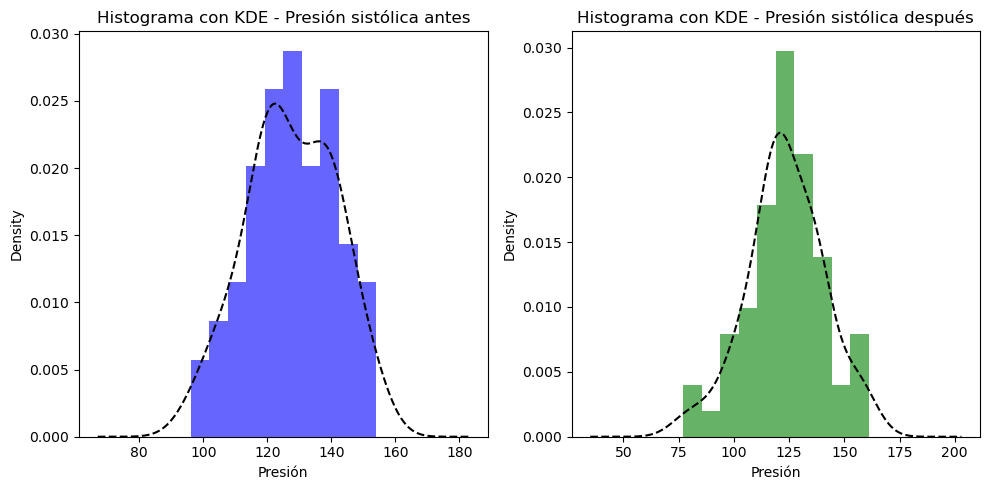

In [6]:
#Datos de presión sistólica antes y después del Grupo 2
presion_antes = df_grupo2['Presion sistólica antes']
presion_despues = df_grupo2['Presión sistólica después']

#Gráfico de histograma con KDE para presión sistólica antes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
presion_antes.plot(kind='hist', bins=10, density=True, alpha=0.6, title='Histograma con KDE - Presión sistólica antes', color='blue')
presion_antes.plot(kind='kde', linestyle='--', color='black')
plt.xlabel('Presión')

#Gráfico de histograma con KDE para presión sistólica después
plt.subplot(1, 2, 2)
presion_despues.plot(kind='hist', bins=10, density=True, alpha=0.6, title='Histograma con KDE - Presión sistólica después', color='green')
presion_despues.plot(kind='kde', linestyle='--', color='black')
plt.xlabel('Presión')

plt.tight_layout()
plt.show()

Basándonos en los resultados proporcionados:

La simetría de ambas distribuciones ('Presión sistólica antes' y 'Presión sistólica después') es cercana a 0, lo que indica una simetría razonablemente buena. 

Sin embargo, la curtosis de la primera toma de presión sistólica es negativa (platicúrtica) y la de la segunda es positiva (leptocúrtica). Esto sugiere que no siguen una distribución normal estándar.

---

## c) Cuartiles y box-plot
Indicaremos para cada una de las variables relacionadas con la medición de la presión sistólica que aparecen en el fichero el valor de los cuartiles y su significado y obtener el box-plot (diagrama de cajas) correspondiente. Después, estudiaremos la presencia de valores atípicos.

In [7]:
#Mediana de 'Presión sistólica antes' y 'Presión sistólica después' para ver si coincide en ambos Q2. 
mediana_ps_antes = df['Presion sistólica antes'].median()
mediana_ps_despues = df['Presión sistólica después'].median()

print(f'Mediana Presión sistólica antes: {mediana_ps_antes}')
print(f'Mediana Presión sistólica después: {mediana_ps_despues}')

Mediana Presión sistólica antes: 125.0
Mediana Presión sistólica después: 120.0


Cuartiles:
Cuartil 25% (Q1) - Presión sistólica antes: 118.0
Cuartil 50% (Q2) - Presión sistólica antes: 125.0
Cuartil 75% (Q3) - Presión sistólica antes: 135.0

Cuartil 25% (Q1) - Presión sistólica después: 115.0
Cuartil 50% (Q2) - Presión sistólica después: 120.0
Cuartil 75% (Q3) - Presión sistólica después: 131.25


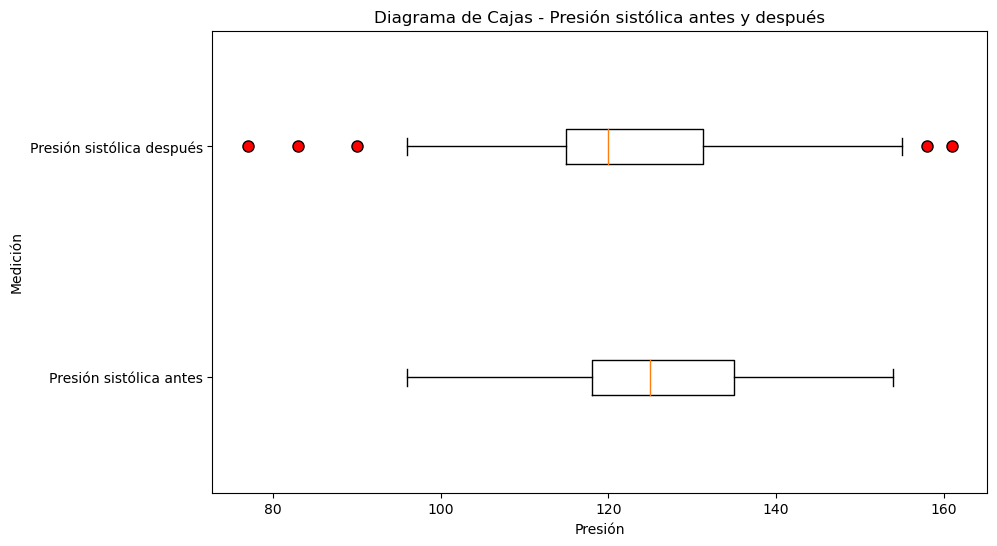

In [8]:
#Cuartiles para 'Presion sistólica antes'
cuartiles_antes = df['Presion sistólica antes'].quantile([0.25, 0.5, 0.75])

#Significado de los cuartiles para 'Presion sistólica antes'
print('Cuartiles:')
print("Cuartil 25% (Q1) - Presión sistólica antes:", cuartiles_antes[0.25])
print("Cuartil 50% (Q2) - Presión sistólica antes:", cuartiles_antes[0.5])
print("Cuartil 75% (Q3) - Presión sistólica antes:", cuartiles_antes[0.75])
print()


#Cuartiles para 'Presion sistólica después'
cuartiles_despues = df['Presión sistólica después'].quantile([0.25, 0.5, 0.75])

#Significado de los cuartiles para 'Presion sistólica después'
print("Cuartil 25% (Q1) - Presión sistólica después:", cuartiles_despues[0.25])
print("Cuartil 50% (Q2) - Presión sistólica después:", cuartiles_despues[0.5])
print("Cuartil 75% (Q3) - Presión sistólica después:", cuartiles_despues[0.75])

#Box-plot para 'Presion sistólica antes' y 'Presion sistólica después'
plt.figure(figsize=(10, 6))
plt.boxplot([df['Presion sistólica antes'], df['Presión sistólica después']], vert=False, labels=['Presión sistólica antes', 'Presión sistólica después'], flierprops=dict(marker='o', markersize=8, markerfacecolor='red'))

plt.title('Diagrama de Cajas - Presión sistólica antes y después')
plt.xlabel('Presión')
plt.ylabel('Medición')

plt.show()

### Presencia de *outliers*
El diagrama de caja presenta, en el caso de la **'Presión sistólica después'**, algunos valores atípicos por debajo del límite inferior y por encima del límite superior. Para encontrar dichos valores haremos el siguiente cálculo y arrojaremos los resultados junto a su índice en la tabla:

In [9]:
#Cuartiles y rango intercuartílico para 'Presión sistólica después'
Q1_despues, Q3_despues = cuartiles_despues[0.25], cuartiles_despues[0.75]
IQR_despues = Q3_despues - Q1_despues

#Encontrar valores atípicos para 'Presión sistólica después'
valores_atipicos_despues = df[(df['Presión sistólica después'] < Q1_despues - 1.5 * IQR_despues) | (df['Presión sistólica después'] > Q3_despues + 1.5 * IQR_despues)]['Presión sistólica después']

print("Valores atípicos en 'Presión sistólica después':")
print(valores_atipicos_despues)

Valores atípicos en 'Presión sistólica después':
42    158
61    161
65     83
67     90
80     77
Name: Presión sistólica después, dtype: int64


Los valores atípicos **158** y **161** corresponden a los valores que se visualizan por encima del límite superior y los valores **77**, **83** y **90** corresponden a los que están por debajo del límite inferior en el diagrama de caja. 

Estos valores pueden estar influenciando la distribución de los datos en la columna 'Presión sistólica después'. Considerando que presenta una simetría negativa y una distribución leptocúrtica, es razonable deducir que los valores atípicos han sesgado la distribución a la derecha. 

Verificaremos rápidamente cómo cambiaría la distribución al eliminar estos valores atípicos, comparando las estadísticas resumidas y visualizando su distribución antes y después mediante un histograma.

Estadísticas resumidas antes de eliminar valores atípicos:
count    100.000000
mean     122.030000
std       14.754869
min       77.000000
25%      115.000000
50%      120.000000
75%      131.250000
max      161.000000
Name: Presión sistólica después, dtype: float64

Estadísticas resumidas después de eliminar valores atípicos:
count     95.000000
mean     122.463158
std       12.267246
min       96.000000
25%      115.000000
50%      120.000000
75%      131.000000
max      155.000000
Name: Presión sistólica después, dtype: float64


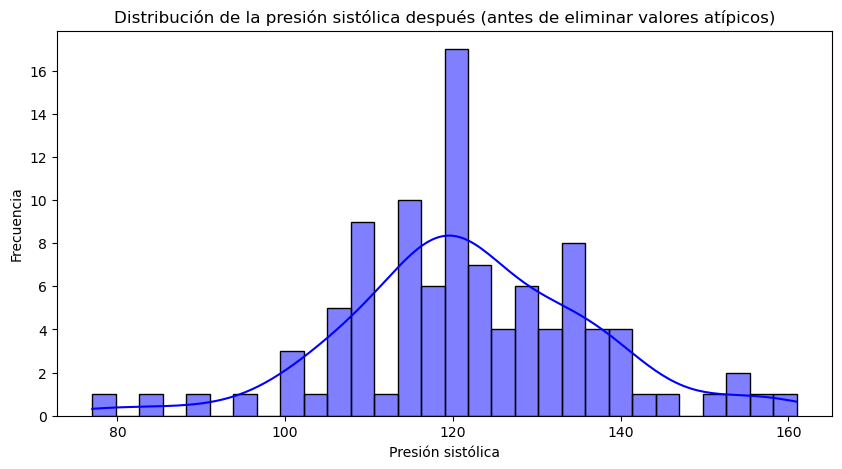

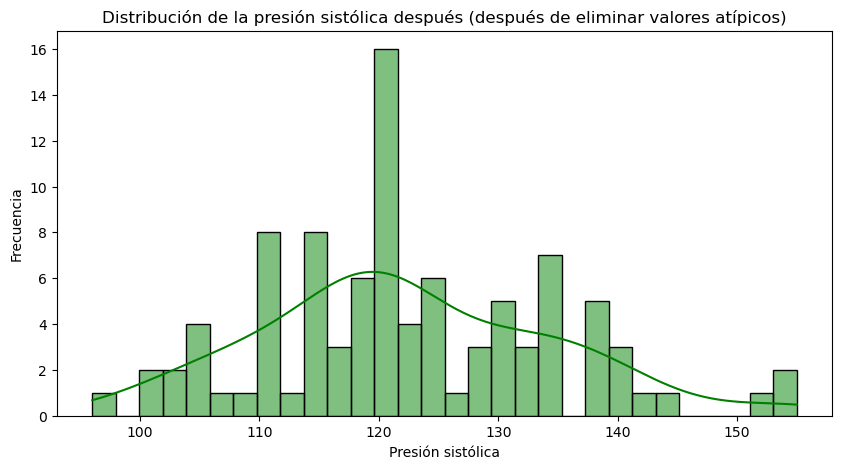

In [10]:
#Estadísticas resumidas antes de eliminar valores atípicos
stats_antes = df['Presión sistólica después'].describe()

#Eliminación valores atípicos usando el rango intercuartílico
df_sin_atipicos = df[(df['Presión sistólica después'] >= Q1_despues - 1.5 * IQR_despues) & (df['Presión sistólica después'] <= Q3_despues + 1.5 * IQR_despues)]

#Estadísticas resumidas después de eliminar valores atípicos
stats_despues = df_sin_atipicos['Presión sistólica después'].describe()

#Imprimir estadísticas resumidas antes y después
print("Estadísticas resumidas antes de eliminar valores atípicos:")
print(stats_antes)
print("\nEstadísticas resumidas después de eliminar valores atípicos:")
print(stats_despues)

#Grafico de la distribución original
plt.figure(figsize=(10, 5))
sns.histplot(df['Presión sistólica después'], kde=True, color='blue', bins=30)
plt.title('Distribución de la presión sistólica después (antes de eliminar valores atípicos)')
plt.xlabel('Presión sistólica')
plt.ylabel('Frecuencia')
plt.show()

#Grafico de la distribución después de eliminar valores atípicos
plt.figure(figsize=(10, 5))
sns.histplot(df_sin_atipicos['Presión sistólica después'], kde=True, color='green', bins=30)
plt.title('Distribución de la presión sistólica después (después de eliminar valores atípicos)')
plt.xlabel('Presión sistólica')
plt.ylabel('Frecuencia')
plt.show()

Al contrastar los dos gráficos, no observamos una diferencia significativa a simple vista. 

Analizando las estadísticas resumidas, se evidencia un ligero desvío de la media hacia abajo por los valores atípicos, junto con una variabilidad mayor de la desviación estándar. Sin embargo, los valores similares de los cuartiles sugiere que la distribución central de los datos no ha cambiado mucho después de eliminar los valores atípicos.

Deducimos, así, que los valores atípicos no afectan significativamente la distribución de los datos de la 'Presión sistólica después'.

---

## d) Prueba de normalidad
Mediante un QQ plot, compararemos los cuantiles de los datos relacionados a la presión sistólica con los cuantiles teóricos esperados de una distribución normal para observar qué tanto se alinean. Nuestras variables siguen siendo la 'Presión sistólica antes' y la 'Presión sistólica después'.

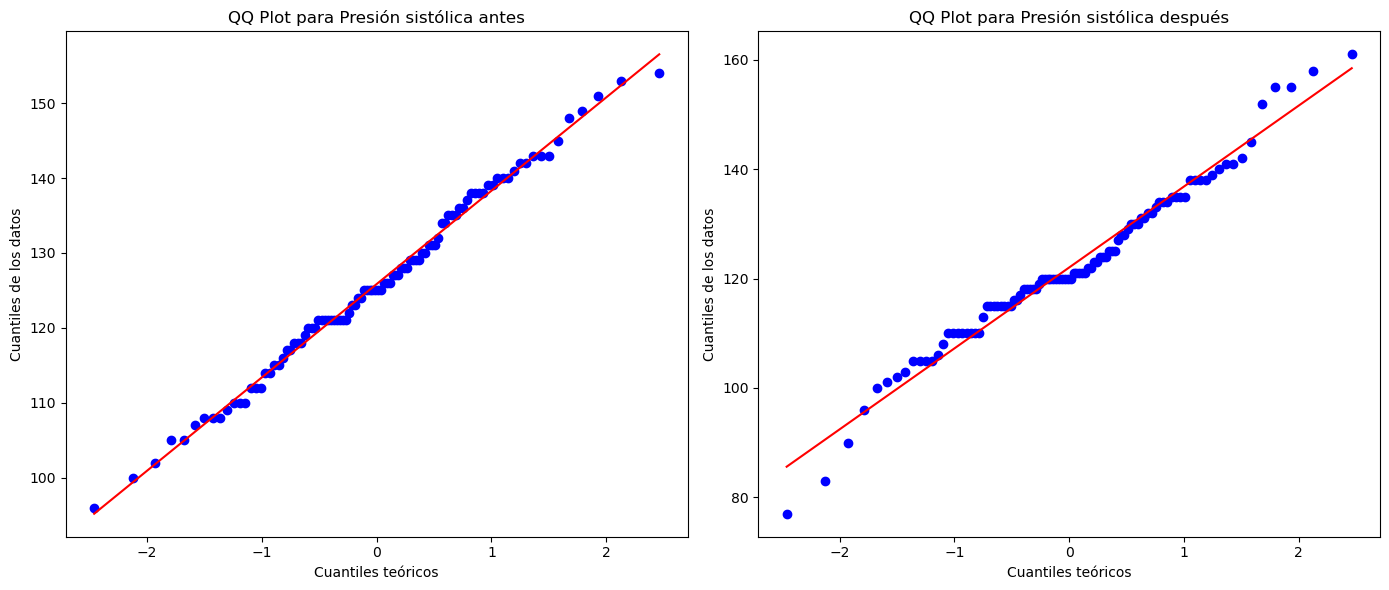

In [11]:
#Asignamos los datos de las dos columnas a sus respectivas variables
presion_antes = df['Presion sistólica antes']
presion_despues = df['Presión sistólica después']

#Creamos figura y ejes de subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

#QQ plot para presión sistólica antes
stats.probplot(presion_antes, dist="norm", plot=axs[0])
axs[0].set_title('QQ Plot para Presión sistólica antes')
axs[0].set_xlabel('Cuantiles teóricos')
axs[0].set_ylabel('Cuantiles de los datos')

#QQ plot para presión sistólica después
stats.probplot(presion_despues, dist="norm", plot=axs[1])
axs[1].set_title('QQ Plot para Presión sistólica después')
axs[1].set_xlabel('Cuantiles teóricos')
axs[1].set_ylabel('Cuantiles de los datos')

plt.tight_layout()
plt.show()

Inmediatamente observamos que la variable de 'Presión sistólica antes' presenta una distribución más alineada a la normal; mientras que la de 'Presión sistólica después' presenta más desviaciones de la línea recta, como habíamos observado al estudiar la presencia de valores atípicos en esta variable. 

A continuación, combinaremos nuestra evaluación con la prueba de Shapiro-Wilk para obtener una imagen más completa y precisa de la distribución de los datos en ambas variables.

### Prueba de normalidad Shapiro-Wilk
Nuestras hipótesis son:
1. **Hipótesis nula (H0): los datos siguen una distribución normal.**
2. **Hipótesis alternativa (H1): los datos no siguen una distribución normal.**

De acuerdo al **valor p** que obtengamos de nuestra prueba (en contraste con un nivel de significancia de 0.05), pasaremos a rechazar o no rechazar nuestra hipótesis nula.

In [12]:
#Prueba de normalidad de Shapiro-Wilk para presión sistólica antes
shapiro_antes = stats.shapiro(presion_antes)
print("Prueba de Shapiro-Wilk para Presión sistólica antes:")
print("Estadístico de prueba:", shapiro_antes[0])
print("Valor p:", shapiro_antes[1])
if shapiro_antes[1] > 0.05:
    print("No se rechaza la hipótesis nula. Los datos parecen provenir de una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los datos no parecen provenir de una distribución normal.")
    
#Prueba de normalidad de Shapiro-Wilk para presión sistólica después
shapiro_despues = stats.shapiro(presion_despues)
print("\nPrueba de Shapiro-Wilk para Presión sistólica después:")
print("Estadístico de prueba:", shapiro_despues[0])
print("Valor p:", shapiro_despues[1])
if shapiro_despues[1] > 0.05:
    print("No se rechaza la hipótesis nula. Los datos parecen provenir de una distribución normal.")
else:
    print("Se rechaza la hipótesis nula. Los datos no parecen provenir de una distribución normal.")

Prueba de Shapiro-Wilk para Presión sistólica antes:
Estadístico de prueba: 0.9919236302375793
Valor p: 0.8156657218933105
No se rechaza la hipótesis nula. Los datos parecen provenir de una distribución normal.

Prueba de Shapiro-Wilk para Presión sistólica después:
Estadístico de prueba: 0.9788827300071716
Valor p: 0.1087479442358017
No se rechaza la hipótesis nula. Los datos parecen provenir de una distribución normal.


### Conclusión
Basándonos en los resultados de la prueba Shapiro-Wilk y del gráfico QQ plot para la presión sistólica antes y después de la ingestión del medicamento, podemos concluir que **los datos presentados en ambas variables parecen seguir una distribución normal**. A pesar de las desviaciones indicadas por los valores de curtosis y el estudio de valores atípicos, los datos aún se aproximan lo suficiente a una distribución normal para que la prueba de normalidad no detecte una desviación significativa.

<hr style="border:2px solid blue">

# Ejercicio 2
Con los datos del fichero anterior, queremos estudiar la relación existente entre la presión sistólica después de la toma del medicamento y el colesterol total del paciente en los pacientes jóvenes (grupo 1).

## a) Relación lineal entre la presión sistólica después de la ingestión del medicamento y el colesterol de los pacientes jóvenes (Grupo 1)

Identificamos el 'Colesterol total' del Grupo 1 como nuestra variable independiente (x) y la 'Presión sistólica después' del Grupo 1 como nuestra variable dependiente (y), en el contexto del estudio y desde un punto de vista biológico, que indica que es más plausible que el colesterol afecte a la presión arterial, que a la inversa. 

Obtendremos los valores de covarianza y de coeficiente de correlación, primeramente, para entender la relación entre estas dos variables.

In [13]:
#Declaración de variables para asignar presión sistólica y colesterol de Grupo 1
presion_despues_grupo1 = df[df['Grupo'] == 1]['Presión sistólica después']
colesterol_grupo1 = df[df['Grupo'] == 1]['Colesterol total']

In [14]:
#Covarianza entre colesterol y presión sistólica después
covarianza = np.cov(colesterol_grupo1, presion_despues_grupo1)[0, 1]

print("Covarianza entre Presión sistólica después y Colesterol total (Grupo 1):", round(covarianza, 4))
print()

#Calculamos el coeficiente de correlación
coef_corr = np.corrcoef(colesterol_grupo1, presion_despues_grupo1)[0, 1]

print("Coeficiente de correlación entre Presión sistólica después y Colesterol total (Grupo 1):", coef_corr)

Covarianza entre Presión sistólica después y Colesterol total (Grupo 1): 84.3769

Coeficiente de correlación entre Presión sistólica después y Colesterol total (Grupo 1): 0.7671351113736181


Una covarianza de **84.3769** sugiere una relación positiva entre ambas variables, lo que significa que cuando una variable aumenta, la otra también tiende a aumentar.

Además, una valor de **0.7671** de coeficiente de correlación nos indica que hay una correlación positiva fuerte entre el colesterol total del paciente y la presión sistólica después de la ingesta del medicamento. La relación lineal entre las dos variables es significativa en el caso de los pacientes del Grupo 1. 

### Gráfico de dispersión

In [15]:
#Importamos algunas funciones adicionales para realizar una regresión lineal y calcular R^2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

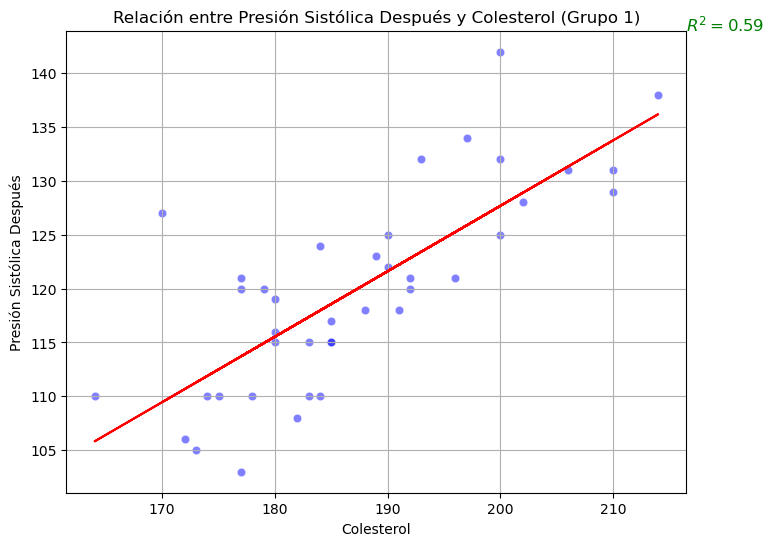

In [16]:
#Modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(colesterol_grupo1.values.reshape(-1, 1), presion_despues_grupo1)

#Coeficiente de determinación (R^2)
predicciones = modelo.predict(colesterol_grupo1.values.reshape(-1, 1))
r_cuadrado = r2_score(presion_despues_grupo1, predicciones)

#Diagrama de dispersión con la línea de regresión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=colesterol_grupo1, y=presion_despues_grupo1, color='blue', alpha=0.5)
plt.plot(colesterol_grupo1, predicciones, color='red')

#Etiquetas y título
plt.title('Relación entre Presión Sistólica Después y Colesterol (Grupo 1)')
plt.xlabel('Colesterol')
plt.ylabel('Presión Sistólica Después')

#Valor de R^2 en la esquina superior derecha del gráfico
plt.text(plt.xlim()[1], plt.ylim()[1], f'$R^2 = {r_cuadrado:.2f}$', fontsize=12, color='green')

#Mostramos el diagrama de dispersión
plt.grid(True)
plt.show()

La forma en la que los datos se ordenan y se agrupan alrededor de la línea de tendencia indican, una vez más, una correlación positiva. Además, el valor del coeficiente de determinación (R^2) de **0.59** significa que aproximadamente el 59% de la variabilidad en la presión sistólica se puede explicar por el colesterol en el Grupo 1. Esto sugiere una **relación moderada a fuerte entre ambas variables**.

---

## b) Modelo lineal que explica la presión sistólica del paciente joven a los 60 minutos de ingerir el medicamento en función de su colesterol total y estimación para un paciente del Grupo 1 cuyo colesterol total es 105 mg/dL

Ajustaremos el modelo de regresión lineal proporcionado anteriormente utilizando el 'Colesterol total' como variable predictora y la 'Presión sistólica después' como variable objetivo. De esta manera, realizaremos una predicción para un paciente del Grupo 1 cuyo colesterol total sea de 105 mg/dL e imprimiremos en la consola el valor de presión sistólica estimado.

In [17]:
#Filtramos una vez más los datos del Grupo 1 para este ejercicio
grupo1 = df[df['Grupo'] == 1]

#Variables predictoras (colesterol total) y la variable objetivo (presión sistólica después)
X = grupo1[['Colesterol total']]
y = grupo1['Presión sistólica después']

#Ajustamos el modelo de regresión lineal
modelo.fit(X, y)

#Predicción para un paciente con colesterol total de 105 mg/dL
colesterol_paciente = [[105]]
presion_predicha = modelo.predict(colesterol_paciente)

print("Presión sistólica estimada para un paciente del Grupo 1 con colesterol total de 105 mg/dL:", presion_predicha[0])

Presión sistólica estimada para un paciente del Grupo 1 con colesterol total de 105 mg/dL: 69.96933033591682


/Users/diegobenjaminvargas/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


*La advertencia desplegada (UserWarning) es meramente informativa y no afecta a la funcionalidad del modelo en sí. Hacemos caso omiso de ella.

Es importante tener en cuenta que esta es una estimación basada en el modelo y puede haber cierto margen de error. Además, otros factores no considerados en el modelo podrían influir en la presión sistólica real del paciente.

---

## c) Porcentaje no explicado en el anterior modelo y mejoras

Al estudiar el modelo de regresión lineal, habíamos calculado el valor del coeficiente de determinación (R^2), que fue de **0.59**. Este valor indica, por lo tanto, que aún queda apróximadamente un **41%** de la variabilidad que no se explica por el modelo y puede ser atribuida a otros factores no incluidos en el modelo de regresión.

Para mejorar nuestro modelo podríamos considerar incluir otras variables y explorar si tienen una relación con la presión sistólica y agregarlas al modelo. Así, pasaríamos a realizar una regresión lineal múltiple, donde utilizaríamos varias variables predictoras para predecir una variable de respuesta y mejorar la capacidad predictiva del modelo.

---

## d) Variación si aumentásemos el colesterol de un paciente en 5 mg/dL. ¿Qué variación experimentaría su presión sistólica después de 60 minutos de ingerir el medicamento?

Para calcular el cambio en la presión sistólica al aumentar el colesterol en 5 mg/dL, primero obtendremos el coeficiente de regresión que nos ayudará en el cálculo.

In [18]:
beta_1 = modelo.coef_[0]

print("El coeficiente de regresión asociado con el colesterol total es:", beta_1)

El coeficiente de regresión asociado con el colesterol total es: 0.6076138687445473


Ahora, asignaremos la variable para el aumento del colesterol y haremos el cálculo:

In [19]:
#Aumento en mg/dL del colesterol
aumento_colesterol = 5

#Cálculo del cambio en la presión sistólica después de 60 minutos
cambio_presion_sistolica = aumento_colesterol * beta_1

print("El cambio en la presión sistólica después de 60 minutos de ingerir el medicamento "
      f"al aumentar el colesterol en {aumento_colesterol} mg/dL es de aproximadamente "
      f"{cambio_presion_sistolica} mmHg.")

El cambio en la presión sistólica después de 60 minutos de ingerir el medicamento al aumentar el colesterol en 5 mg/dL es de aproximadamente 3.038069343722736 mmHg.


Este resultado indica que, en promedio, se espera un aumento de aproximadamente **3.04 mmHg** en la presión sistólica después de 60 minutos por cada aumento de 5 mg/dL en el colesterol total del paciente. Esta información es útil para entender cómo el colesterol total puede influir en la presión arterial y cómo se relacionan estas variables en el contexto del estudio.

<hr style="border:2px solid blue">

# Ejercicio 3

## a) Presión sistólica media de 130 mm de Hg en Grupo 2
Queremos estudiar si se puede admitir que la presión sistólica media en el momento de la ingestión de la población adulta (grupo 2) es 130 mm de Hg. Obtendremos un intervalo de confianza al 95% y al 99% para el nivel medio de presión sistólica antes de la toma del medicamento en el grupo de los adultos.

### Intervalos de confianza
Para estudiar si se puede admitir que la presión sistólica media en el momento de la ingestión del medicamento para el Grupo 2, primero obtendremos el intervalo de confianza al **95%** y al **99%** para el nivel medio. Al desconocer la desviación estándar de la población utilizaremos la **distribución t-Student**.

In [20]:
#Filtramos los datos del grupo 2 para este estudio
datos_grupo2 = df[df['Grupo'] == 2]

#Extraemos los valores de presión sistólica antes del grupo 2
presion_sistolica_grupo2 = datos_grupo2['Presion sistólica antes'].values

#Media y desviación estándar muestral
media = np.mean(presion_sistolica_grupo2)
desviacion_estandar = np.std(presion_sistolica_grupo2, ddof=1)  #ddof=1 para calcular la desviación estándar muestral

#Tamaño de la muestra (60 pacientes)
n = len(presion_sistolica_grupo2)

#Calculamos el error estándar de la media
error_estandar = desviacion_estandar / np.sqrt(n)

#Calculamos los valores críticos de la distribución t de Student
t_alpha_95 = stats.t.ppf(0.975, df=n-1)  #Para un nivel de confianza del 95%
t_alpha_99 = stats.t.ppf(0.995, df=n-1)  #Para un nivel de confianza del 99%

#Calculamos los márgenes de error
margin_error_95 = t_alpha_95 * error_estandar
margin_error_99 = t_alpha_99 * error_estandar

#Construimos los intervalos de confianza y redondeamos para mostrar sólo 4 decimales
intervalo_confianza_95 = (media - margin_error_95, media + margin_error_95)
intervalo_confianza_99 = (media - margin_error_99, media + margin_error_99)

intervalo_confianza_95 = tuple(round(valor, 4) for valor in intervalo_confianza_95)
intervalo_confianza_99 = tuple(round(valor, 4) for valor in intervalo_confianza_99)

print("Intervalo de confianza al 95%:", intervalo_confianza_95)
print("Intervalo de confianza al 99%:", intervalo_confianza_99)

Intervalo de confianza al 95%: (123.8955, 131.0712)
Intervalo de confianza al 99%: (122.7107, 132.256)


Los resultados indican que, con un nivel de confianza del 95%, podemos estar razonablemente seguros de que la presión sistólica media en el momento de la ingestión del Grupo 2 se encuentra en el intervalo entre **123.8955** y **131.0712** mmHg. De manera similar, con un nivel de confianza del 99%, podemos estar aún más seguros de que la presión sistólica media está en el intervalo entre **122.7107** y **132.256**.

### Contraste de hipótesis
Para contestar a la cuestión planteada haremos el siguiente contraste de hipótesis.

Primero formularemos nuestras hipótesis nula y alternativa:

1. **Hipótesis nula (H0): la presión sistólica media en el Grupo 2 es igual a 130mmHg.**
2. **Hipótesis alternativa (H1): la presión sistólica media en el Grupo 2 no es igual a 130mmHg.**

Para calcular el estadístico de prueba, recordemos nuestra media muestral, nuestra media poblacional hipotética, nuestra desviación estándar muestral y el tamaño de nuestra muestra, y definamos sus valores como parámetros: 

In [21]:
x_bar = media
print('Media muestral:', x_bar)

mu = 130
print(f'Media poblacional hipotética: {mu}(mmHg)')

s = desviacion_estandar
print('Desviación estándar muestral:', s)

print('Tamaño de nuestra muestra: ', n)

Media muestral: 127.48333333333333
Media poblacional hipotética: 130(mmHg)
Desviación estándar muestral: 13.888773257522425
Tamaño de nuestra muestra:  60


Seleccionamos un **nivel de significancia** de **0.05**, que indicará la probabilidad de cometer un error de Tipo I al rechazar incorrectamenta la hipótesis nula.

Ahora, hagamos el cálculo de nuestro estadístico de prueba t, siguiendo la fórmula, y el de nuestro valor p haciendo uso de la función 't.cdf()' de la librería scipy.stats. En seguida, comprobaremos si nuestro valor p es mayor o menor que nuestro nivel de significancia, y dependiendo del resultado, rechazaremos o no rechazaremos la hipótesis nula.

In [22]:
#Estadístico de prueba t
t_statistic = (x_bar - mu) / (s / (n ** 0.5))

#Valor p
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=n - 1))

#Nivel de significancia para un intervalo de confianza del 95%
alpha = 0.05

#Imprimir los resultados
print("Estadístico de prueba t:", t_statistic)
print("Valor p:", p_value)

#Comprobamos si se rechaza la hipótesis nula para un intervalo de confianza del 95%
if p_value < alpha:
    print("Conclusión: Se rechaza la hipótesis nula")
else:
    print("Conclusión: No se rechaza la hipótesis nula")

Estadístico de prueba t: -1.4035808501195257
Valor p: 0.1656852574507901
Conclusión: No se rechaza la hipótesis nula


Haremos el mismo procedimiento, pero para un nivel de significancia de 0.01, siguiendo un intervalo de confianza del 99%.

In [23]:
#Nivel de significancia para un intervalo de confianza del 99%
alpha = 0.01

#Imprimir los resultados
print("Estadístico de prueba t:", t_statistic)
print("Valor p:", p_value)

#Comprobamos si se rechaza la hipótesis nula para un intervalo de confianza del 99%
if p_value < alpha:
    print("Conclusión: Se rechaza la hipótesis nula")
else:
    print("Conclusión: No se rechaza la hipótesis nula")

Estadístico de prueba t: -1.4035808501195257
Valor p: 0.1656852574507901
Conclusión: No se rechaza la hipótesis nula


Basándonos en los valores p obtenidos y contrastándolos con los niveles de significancia (de 0.05 y 0.01), verificamos que no hay suficiente evidencia para rechazar la hipótesis nula.

Por lo tanto, con un nivel de confianza del 95% y un nivel de confianza del 99%, **no podemos concluir que la presión sistólica media en el momento de la ingestión del medicamento sea diferente de 130mmHg para la población adulta (Grupo 2)**.

---

## b) Diferencia de medias en la presión sistólica entre adultos y jóvenes después de la ingestión del medicamento

Para el siguiente estudio, obtendremos el intervalo de confianza al 95% y concluiremos si la presión sistólica media de la población después de la ingestión del medicamento es distinta dependiendo de la edad.

In [24]:
#Filtramos los datos del grupo 1 y 2 para este estudio
datos_grupo1 = df[df['Grupo'] == 1]
datos_grupo2 = df[df['Grupo'] == 2]

#Extraemos los valores de presión sistólica después de ambos grupos
presion_despues_grupo1 = datos_grupo1['Presión sistólica después'].values
presion_despues_grupo2 = datos_grupo2['Presión sistólica después'].values

#Media y desviación estándar muestral
media_g1 = np.mean(presion_despues_grupo1)
std_g1 = np.std(presion_despues_grupo1, ddof=1)
media_g2 = np.mean(presion_despues_grupo2)
std_g2 = np.std(presion_despues_grupo2, ddof=1)

#Tamaños de las muestras (G1: 40 y G2: 60)
n1 = len(presion_despues_grupo1)
n2 = len(presion_despues_grupo2)

#Diferencia de medias
diferencia_medias = media_g1 - media_g2
print('La diferencia de medias es de:', diferencia_medias)

La diferencia de medias es de: -3.549999999999997


In [25]:
#Intervalo de confianza al 95% para la diferencia de medias
grados_libertad = n1 + n2 - 2  # Grados de libertad
t_alpha_95 = stats.t.ppf(0.975, df=grados_libertad)  # Valor crítico para alfa/2
margen_error = t_alpha_95 * np.sqrt((std_g1 ** 2 / n1) + (std_g2 ** 2 / n2))  # Margen de error
intervalo_confianza_95 = (diferencia_medias - margen_error, diferencia_medias + margen_error)

#Resultados
print("Intervalo de confianza al 95% para la diferencia de medias:", intervalo_confianza_95)

Intervalo de confianza al 95% para la diferencia de medias: (-8.88269153315477, 1.7826915331547752)


### Conclusión
Basándonos en el intervalo de confianza obtenido para la diferencia de medias en la presión sistólica entre adultos y jóvenes después de la ingestión del medicamento, que fue de **(-8.88, 1.78)**, concluimos que **no podemos afirmar con un nivel de confianza del 95% que la presión sistólica media de la población es diferente dependiendo de la edad**. Esto se debe a que el intervalo de confianza incluye el valor cero, lo que indica que no hay una diferencia significativa en la presión sistólica media entre adultos y jóvenes después de la ingestión del medicamento.

---

## c) Estudio de proporción de la población con prehipertensión (130 mmHg) (intervalo de confianza del 99% y contraste de hipótesis)

Para obtener un intervalo de confianza, utilizaremos la distribución normal estándar (z), calculando, primeramente, la proporción muestral de personas con presión sistólica igual o superior a 130mmHg.

In [26]:
#Número de personas con presión sistólica igual o superior a 130 mmHg
n = df[df['Presion sistólica antes'] >= 130].shape[0]

#Total de personas en la muestra
N = df.shape[0]

#Proporción de personas con presión sistólica mayor o igual a 130 mmHg
proporcion = n / N

print('La proporción muestral de personas con presión sistólica igual o superior a 130mmHg es:', proporcion)

La proporción muestral de personas con presión sistólica igual o superior a 130mmHg es: 0.35


### Intervalo de confianza

In [27]:
#Error estándar de la proporción
error_estandar_proporcion = np.sqrt(proporcion * (1 - proporcion) / N)

#Valor crítico Z para un nivel de confianza del 99%
z_alpha = stats.norm.ppf(1 - 0.01 / 2)

#Límite inferior del intervalo de confianza
limite_inferior = proporcion - z_alpha * error_estandar_proporcion

#Límite superior del intervalo de confianza
limite_superior = proporcion + z_alpha * error_estandar_proporcion

print("Intervalo de confianza al 99% para la proporción de personas con presión sistólica mayor o igual a 130 mmHg:")
print("Limite inferior:", limite_inferior)
print("Limite superior:", limite_superior)

Intervalo de confianza al 99% para la proporción de personas con presión sistólica mayor o igual a 130 mmHg:
Limite inferior: 0.22714077255930973
Limite superior: 0.4728592274406902


Con un intervalo de confianza del 99%, podemos estar bastante seguros de que **la proporción de personas con presión sistólica mayor o igual a 130 mmHg se encuentra entre aproximadamente 22.71% y 47.29%**.

### Contraste de hipótesis
A continuación, se desea contrastar la hipótesis de que el porcentaje de la población con presión sistólica superior o igual a 130mmHg es de 0,30, con un nivel de significación del 5%. 

Nuestras hipótesis:
1. **Hipótesis nula (H0): la proporción poblacional es igual a 0.30**
2. **Hipótesis alternativa (H1): la proporción poblacional es diferente de 0.30**

Calcularemos el estadístico de prueba Z y su correspondiente valor p para evaluar si hay suficiente evidencia para rechazar la hipótesis nula.

In [28]:
#Proporción observada en la muestra
prop_obs = 0.35

#Proporción hipotética
prop_hipotetica = 0.30

#Nivel de significancia del 5%
alpha = 0.05

#Estadístico de prueba Z
desviacion_estandar = np.sqrt((prop_hipotetica * (1 - prop_hipotetica)) / N)
Z = (prop_obs - prop_hipotetica) / desviacion_estandar

#Valor p (usamos una distribución normal estándar)
p_value = 2 * (1 - stats.norm.cdf(abs(Z)))

#Resultados
print("Estadístico de prueba Z:", Z)
print("Valor p:", p_value)

#Comprobamos si se rechaza la hipótesis nula para un intervalo de confianza del 95%
if p_value < alpha:
    print("Conclusión: Se rechaza la hipótesis nula")
else:
    print("Conclusión: No se rechaza la hipótesis nula")

Estadístico de prueba Z: 1.0910894511799616
Valor p: 0.27523352407483426
Conclusión: No se rechaza la hipótesis nula


### Conclusión
Siendo que el **valor p** asociado es aproximadamente **0.275**, siendo mayor que el nivel de significancia elegido de 0.05, no hay suficiente evidencia para rechazar la hipótesis nula. En otras palabras, no hay suficiente evidencia para concluir que la proporción de la población con presión sistólica igual o superior a 130mmHg es diferente de 0.30. 

---

## d) Eficacia del medicamento en la población adulta

Para evaluar si existe una variación significativa de la presión sistólica después de la toma del medicamento en la población adulta, realizaremos un contraste de hipótesis utilizando muestras emparejadas, donde compararemos las diferencias entre la presión sistólica antes y después de la toma del medicamento en el Grupo 2. 

Primero, calcularemos la media y la desviación estándar de las diferencias entre la presión sistólica antes y después de la toma del medicamento en el grupo de adultos.

In [29]:
#Filtramos el DataFrame para incluir solo observaciones del Grupo 2
grupo2 = df[df['Grupo'] == 2]

#Diferencias entre la presión sistólica antes y después del medicamento
diferencias = grupo2['Presión sistólica después'] - grupo2['Presion sistólica antes']

#Media y la desviación estándar de las diferencias
media_diferencias = diferencias.mean()
std_diferencias = diferencias.std()

print("Media de las diferencias:", media_diferencias)
print("Desviación estándar de las diferencias:", std_diferencias)

Media de las diferencias: -4.033333333333333
Desviación estándar de las diferencias: 8.256413360650066


### Contraste de hipótesis
Utilizaremos la pruebra **t-Student**, ya que desconocemos la desviación estándar poblacional.

Nuestras hipótesis son:
1. **Hipótesis nula (H0): La diferencia media en la presión sistólica antes y después del medicamento es cero (no hay cambio).**
2. **Hipótesis alternativa (H1): La diferencia media en la presión sistólica antes y después del medicamento es diferente de cero (hay un cambio).**

Calcularemos el estadístico de prueba t para una muestra emparejada, dividiendo la diferencia media entre el error estándar de ésta. Luego, usaremos el estadístico t y los grados de libertad (n-1) para calcular el valor p correspondiente. Si el valor p es menor que el nivel de significancia (0.05), rechazaremos la hipótesis nula y concluiremos que hay evidencia suficiente para decir que la diferencia media es estadísticamente significativa.

In [30]:
 #Tamaño de la muestra
n = len(diferencias)

#Nivel de significancia del 5%
alpha = 0.05

#Estadístico de prueba t
t_statistic = media_diferencias / (std_diferencias / (n ** 0.5))

#Calcular el valor p de dos colas
p_value = stats.t.sf(abs(t_statistic), df=n-1) * 2

print("Estadístico de prueba t:", t_statistic)
print("Valor p:", p_value)

#Comprobamos si se rechaza la hipótesis nula para un intervalo de confianza del 95%
if p_value < alpha:
    print("Conclusión: Se rechaza la hipótesis nula")
else:
    print("Conclusión: No se rechaza la hipótesis nula")

Estadístico de prueba t: -3.783975473939529
Valor p: 0.0003631177548992737
Conclusión: Se rechaza la hipótesis nula


### Conclusión
Podemos concluir que hay evidencia estadística significativa para afirmar que **el medicamento tiene un efecto positivo en la reducción de la presión sistólica en la población adulta**. Este resultado respalda la eficacia del medicamento en el tratamiento de la presión arterial alta en este grupo específico de pacientes.

<hr style="border:2px solid blue">